<a href="https://colab.research.google.com/github/factorLee/FastCampus/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 실습

# 1.함수 익히기 및 모듈 불러오기
- 함수 익히기

In [ ]:
from sklearn import tree
X = [[0,0],[1,1]] # 2개의 Attribute로 구성되어있는 X
Y = [0,1] # 0과 1이라는 관측치 (2-Class prob)
clf = tree.DecisionTreeClassifier() # tree객체에서 불러옴
clf = clf.fit(X,Y)

In [ ]:
clf.predict([[1,1]])

# 여기까지 sklearn의 기본적인 구조. (전반적인 overview)

array([1])

- 모듈 불러오기

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from os import system

In [ ]:
system('pip install graphviz') # 터미널 혹은 커맨드에 입력하게 해주는 system함수

0

In [ ]:
import graphviz

- 데이터 로드

In [ ]:
iris = load_iris() # Attribute

In [ ]:
# iris.data -> Attribute, iris.target -> y값(종속변수), iris.feature_names -> iris.data 변수의 이름들, iris.target_names -> y범주가 의미하는 이름
iris.data 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2.의사결정나무 구축 및 시각화
- 트리 구축

In [ ]:
clf = tree.DecisionTreeClassifier()# 범주형변수=> classifier
clf=clf.fit(iris.data,iris.target)


- 트리의 시각화

In [ ]:
dot_data=tree.export_graphviz(clf, out_file=None,
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

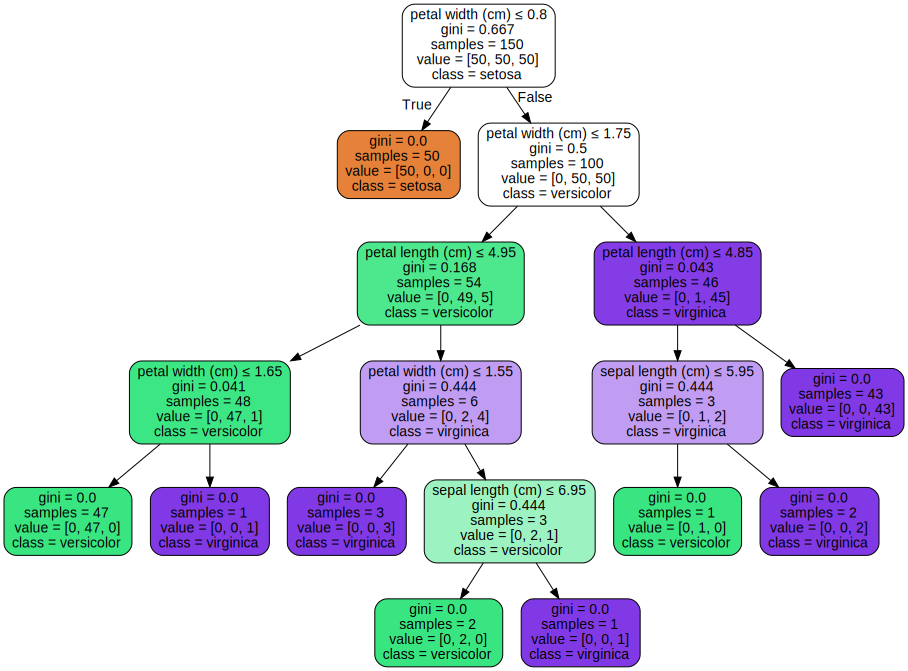

In [ ]:
graph 
# gini 계수는 높은경우보다 낮은경우에 더 선호한다.
# petal length가 2.45보다 작거나 같으면 gini가 0이고, value가 [50,0,0] 이기 때문에 'setosa'로 분류할 수 있다.
#

- 엔트로피를 활용한 트리

In [ ]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')# criterion을 entropy로 설정

In [ ]:
clf2.fit(iris.data,iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dot_data2=tree.export_graphviz(clf2, out_file=None,
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True)

graph2 = graphviz.Source(dot_data2)

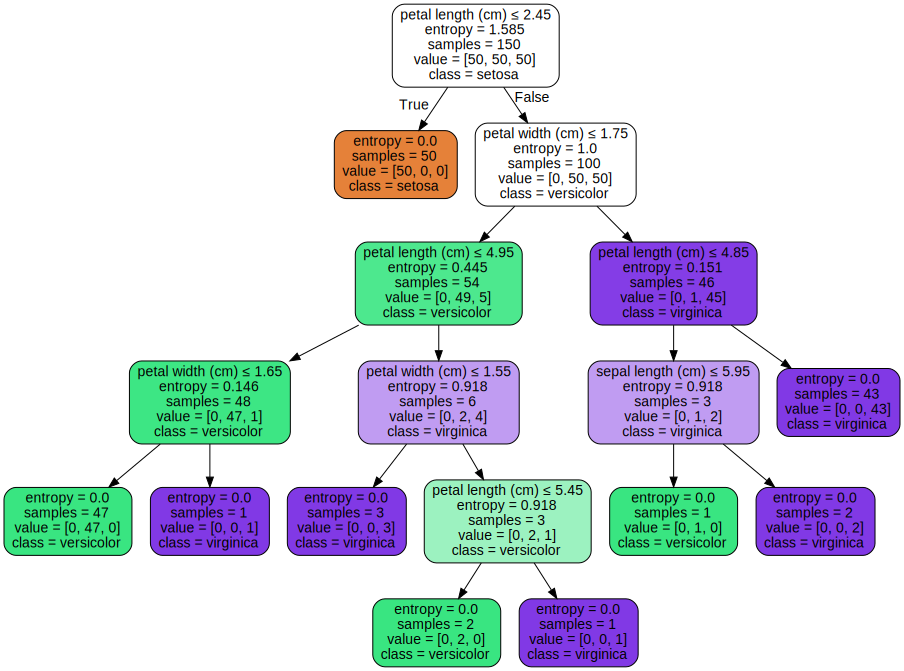

In [ ]:
graph2
# 너무 복잡한 모델을 설계하면 오버피팅의 위험이 있다. -> 프루닝으로 해결가능

- 프루닝 (오버피팅을 간단한 방법으로 피해보자)
max_depth 

In [ ]:
clf3=tree.DecisionTreeClassifier(criterion='entropy', max_depth=2) # max_depth로 우리가 가지는 가지의 개수를 컨트롤할 수 있다. depth를 최대 2개만 설정했다.

In [ ]:
clf3.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

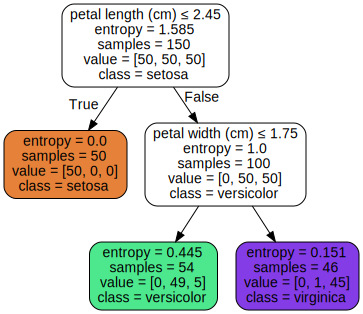

In [ ]:
dot_data3=tree.export_graphviz(clf3, out_file=None,
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True)

graph3 = graphviz.Source(dot_data3)
graph3 # depth 최대 2개
# 각각의 entropy가 다 0이 되지 못하고 끊어버리는것을 프루닝이라고 한다. 과적합을 피하기 위해 모델의 복잡도를 간단하게 한다.

- Confution Matrix 구하기

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target,clf.predict(iris.data)) # gini


array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [ ]:
# entropy
confusion_matrix(iris.target,clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [ ]:
# 프루닝
confusion_matrix(iris.target,clf3.predict(iris.data)) # train set에서 어느정도 오차를 보이지만, test set에서 좋은 결과를 낼 수도 있다.

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

# 3. Training - Test 구분 및 Confusion matrix 계산 (과적합을 고려해보자)

In [ ]:
from sklearn.model_selection import train_test_split # train과 test를 구분해주는 함수는 model_selection에 있는 train_test_split이라는 함수다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,stratify=iris.target,random_state=1) # 기본적으로 3/4이 train, 1/4가 test로 세팅이됨

In [ ]:
clf4=tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf4.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
confusion_matrix(y_test,clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 11]])

# 4. Decision regressiontree
- 모듈 불러오기 및 데이터 생성

In [ ]:
# regression은 y변수(반응변수)가 연속형일때 사용
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5*rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y[::5] +=3 * (0.5 - rng.rand(16))

- Regression tree 구축

In [ ]:
# max_depth를 달리해서 비교
regr1=tree.DecisionTreeRegressor(max_depth=2)
regr2=tree.DecisionTreeRegressor(max_depth=5)

In [ ]:
regr1.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
regr2.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
X_test=np.arange(0.0, 5.0, 0.01)[:,np.newaxis]
X_test

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [ ]:
y_1=regr1.predict(X_test)
y_2=regr2.predict(X_test)

In [ ]:
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

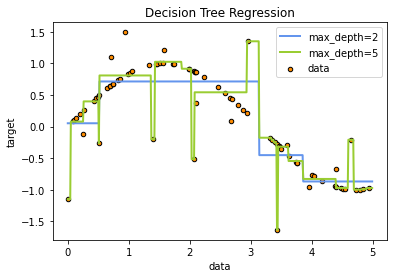

In [ ]:
# depth에 따라 결과가 어떻게 변하는거 그래프로 확인
plt.figure()
plt.scatter(X,y,s=20,edgecolors='black',
            c='darkorange', label='data')
plt.plot(X_test, y_1, color='cornflowerblue',
         label='max_depth=2', linewidth=2)
plt.plot(X_test, y_2, color='yellowgreen',
         label='max_depth=5', linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

# depth=5는 이상치까지 잘찾아가고있음(복잡하게 찾아가고있음: 오버피팅의 위험)

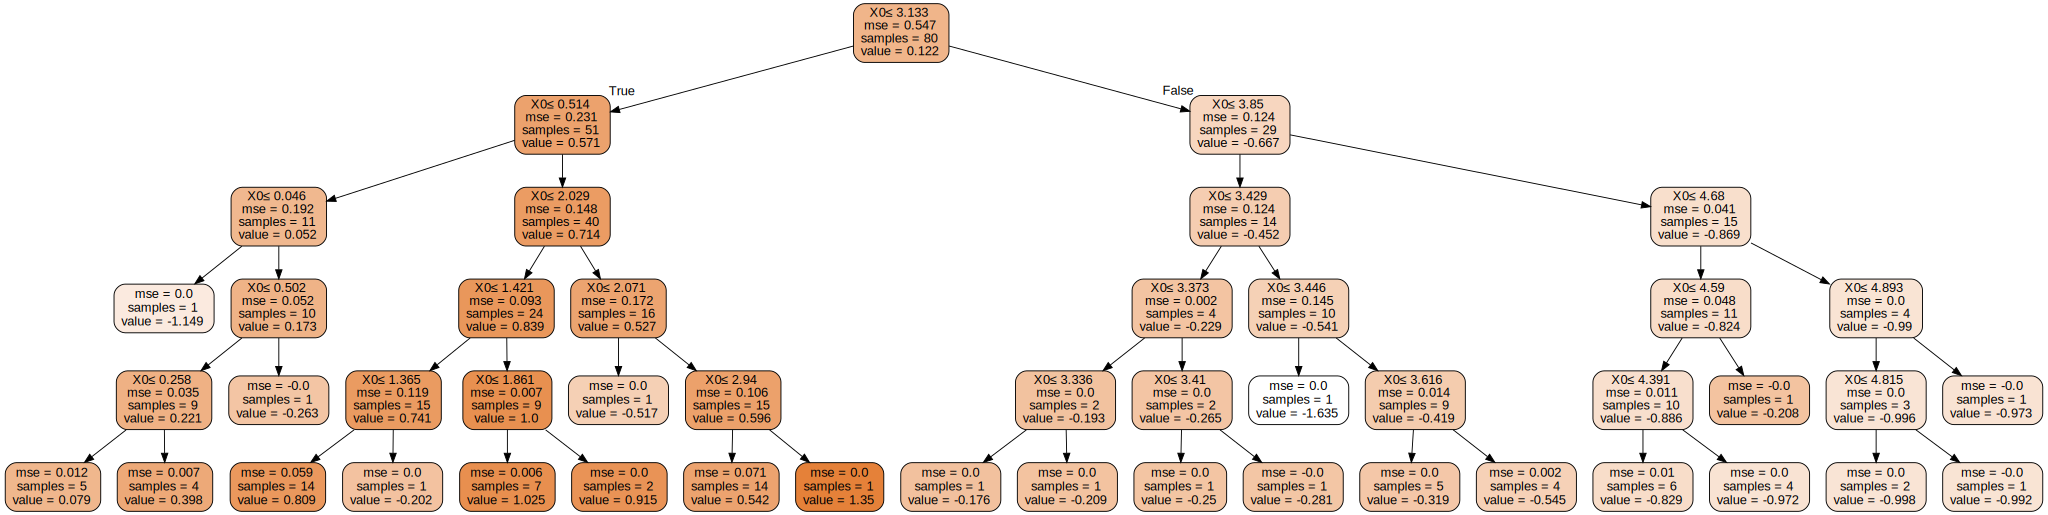

In [ ]:
# depth가 5인 그래프
dot_data4=tree.export_graphviz(regr2, out_file=None,
                              filled=True, rounded=True,
                              special_characters=True)

graph4 = graphviz.Source(dot_data4)
graph4

# 분류 모델에서의 entropy와 예측 모델에서의 MSE는 같은 맥락으로 이해하면 된다.(작아지면 좋다.)
# sample 갯수가 작아지면서 MSE도 작아진다.
# value가 이 범주에 해당하는 집단의 대표값이 된다.(ex. y의 평균 등 이다., 예측을 하려면 value 값을 쓰면 된다.)

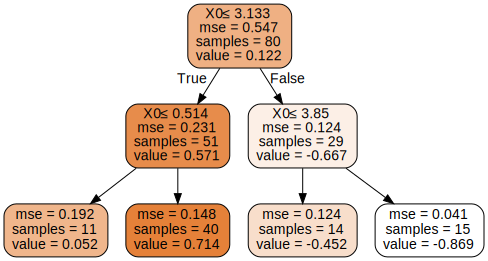

In [ ]:
# depth가 2인 그래프
dot_data5=tree.export_graphviz(regr1, out_file=None,
                              filled=True, rounded=True,
                              special_characters=True)

graph5 = graphviz.Source(dot_data5)
graph5

# value가 클수록 진하고, 작을수록 흰색으로 음영처리가 되어 있다.